In [80]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output
from keras.callbacks import Callback
from keras.utils import to_categorical
from keras.models import load_model
from src.dataset_builders.cnn_rnn_data import CnnRnnData
from src import cnn_rnn as nn

def show(arr):
    plt.imshow(arr, cmap="gray")
    plt.show()
    

class TrainingPlot(Callback):
    
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.acc = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_acc'))
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:
            
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # You can chose the style of your preference
            # print(plt.style.available) to see the available options
            plt.style.use("seaborn")

            fig, ax1 = plt.subplots()

            ax1.set_xlabel('Epoch #')
            ax1.set_ylabel('Accuracy')
            l1 = ax1.plot(N, self.acc, label = "train_acc", color="b")[0]
            l2 = ax1.plot(N, self.val_acc, label = "val_acc", color="r")[0]
            ax1.tick_params(axis='y')
            ax1.set_ylim([0, 1.05])

            # instantiate a second axes that shares the same x-axis
            ax2 = ax1.twinx()  

            ax2.set_ylabel('Loss')
            l3 = ax2.plot(N, self.losses, label = "train_loss", color="c")[0]
            l4 = ax2.plot(N, self.val_losses, label = "val_loss", color="m")[0]
            ax2.tick_params(axis='y')
            ax2.set_ylim([0, 2.5])

            # Labels to use in the legend for each line
            line_labels = ["Training Accuracy", "Validation Accuracy", "Training Loss", "Validation Loss"]
            plt.title("Loss and Accuracy [Epoch {}]   Val Loss: {:.4f}   Val Acc: {:.4f}"
                      .format(epoch, self.val_losses[-1], self.val_acc[-1])
                     )
            fig.legend([l1, l2, l3, l4],     # The line objects
                       line_labels,          # The labels for each line
                       loc="upper right", 
                       bbox_to_anchor=(1.2, .95),                       
                       )
            
            fig.tight_layout()  # otherwise the right y-label is slightly clipped
            plt.show()

In [ ]:
def plot_history(acc, val_acc, losses, val_losses):
    # Clear the previous plot
    clear_output(wait=True)
    N = np.arange(0, len(losses))

    # You can chose the style of your preference
    # print(plt.style.available) to see the available options
    plt.style.use("seaborn")

    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Epoch #')
    ax1.set_ylabel('Accuracy')
    l1 = ax1.plot(N, acc, label = "train_acc", color="b")[0]
    l2 = ax1.plot(N, val_acc, label = "val_acc", color="r")[0]
    ax1.tick_params(axis='y')
    ax1.set_ylim([0, 1.05])

    # instantiate a second axes that shares the same x-axis
    ax2 = ax1.twinx()  

    ax2.set_ylabel('Loss')
    l3 = ax2.plot(N, losses, label = "train_loss", color="c")[0]
    l4 = ax2.plot(N, val_losses, label = "val_loss", color="m")[0]
    ax2.tick_params(axis='y')
    ax2.set_ylim([0, 2.5])

    # Labels to use in the legend for each line
    line_labels = ["Training Accuracy", "Validation Accuracy", "Training Loss", "Validation Loss"]
    plt.title("Loss and Accuracy [Epoch {}]   Val Loss: {:.4f}   Val Acc: {:.4f}"
              .format(epoch, self.val_losses[-1], self.val_acc[-1])
             )
    fig.legend([l1, l2, l3, l4],     # The line objects
               line_labels,          # The labels for each line
               loc="upper right", 
#                        bbox_to_anchor=(.85, .9),                       
               bbox_to_anchor=(1.2, .95),                       
               )

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    
    
losses = [2.3, 2.0, 1.7, 1.5]
acc = [.1, .15, .20, .40]
val_losses = [2.3, 2.1, 1.4, 1.55]
val_acc = [.1, .14, .24, .35]
# logs = [1, 1, 1, 1]

plot_history(acc, val_acc, losses, val_losses)

# Create a training set from MNIST data

In [2]:
path_model = "../data/cnn_rnn_128_noise_padded.h5"
(x_train, y_train), (x_test, y_test) = CnnRnnData().noise_padded_data

[6 7]


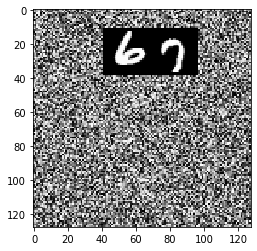

[1 1]


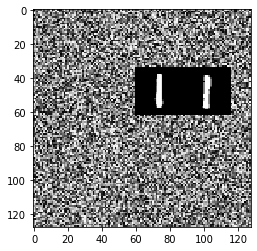

[3 5]


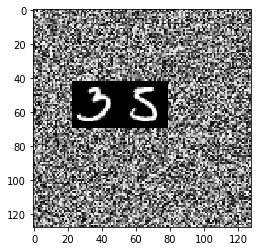

In [3]:
N = 3000

x_train = x_train[:N]
y_train = y_train[:N]
x_test = x_test[:N]
y_test = y_test[:N]

for ii, im in enumerate(x_test[:3]):
    print(y_test[ii])
    show(im)

# Load Experimental Settings

In [4]:
# from src.nn_settings.cnn_rnn_config import Config
from src.nn_settings.cnn_rnn_config import CnnRnnConfig

# keras_shape = (-1, 28, 56, 1)
keras_shape = (-1, 128, 128, 1)
input_encoding = x_train.reshape(keras_shape)
output_encoding = to_categorical(y_train)

num_epochs = 200
batch_size = 32
# batch_size = 24
# validation_split = 0.1
validation_split = 0.2

cnf = CnnRnnConfig(
            input_shape = (None, 128, 128, 1), 
            output_size = 10,        # num possible outputs from rnn (out vocab size)
            max_out_seq_len  = 2, 
            use_gru = True, 
            latent_dim = 16, 
            use_bidirectional = False, 
            unroll = False, 
            cnn_part=3, # 2, 
        )
cnf = cnf._asdict()

print(input_encoding.shape)
for kk, vv in cnf.items():
    print("\t", kk, ":", vv)

(3000, 128, 128, 1)
	 input_shape : (None, 128, 128, 1)
	 output_size : 10
	 max_out_seq_len : 2
	 use_gru : True
	 latent_dim : 16
	 use_bidirectional : False
	 unroll : False
	 cnn_part : 3


# Load the Model

In [81]:
LOAD = False
if LOAD:
    # Load a pre-existing model
    model = load_model(path_model)
else:
    # Create a new model
    model = nn.cnn_rnn(**cnf)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 32, 32, 16)        1040      
_________________________________________________________________
batch_normalization_97 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_78 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_98 (Batc (None, 16, 16, 32)        128       
__________

# Train!

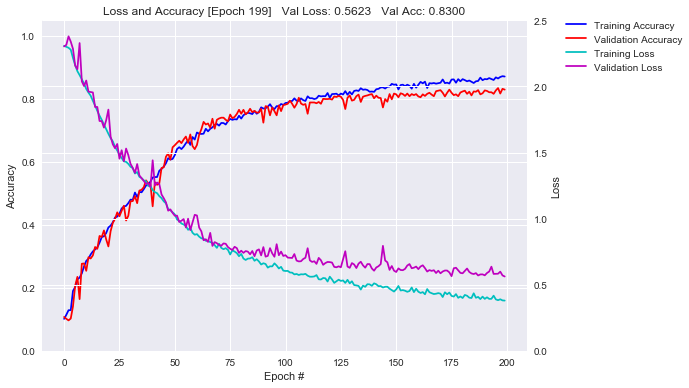

In [82]:
plot_losses = TrainingPlot()

hist = model.fit(input_encoding, 
                  output_encoding,
                  batch_size=batch_size,
                  epochs=num_epochs,
                  validation_split=validation_split,
                  callbacks=[plot_losses]
                 )